<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Regress%C3%A3o_Linear_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear - Stats Model**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
dados = pd.read_csv('Regresao_Linear.csv')
dados.head()

,X,Y
0,0.00000,-11.656137
1,0.10101,-8.074456
2,0.20202,-16.588246
3,0.30303,-4.275013
4,0.40404,-8.714275


In [140]:
X = dados['X'].values
y = dados['Y'].values

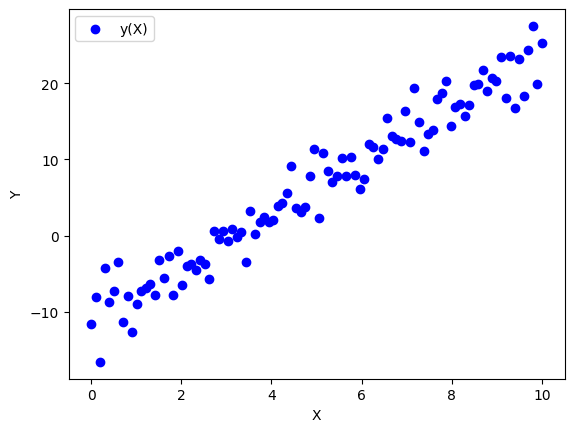

In [141]:
fig, ax = plt.subplots()
ax.scatter(X, y, label='y(X)', c='blue')

plt.xlabel('X', size=10)
plt.ylabel('Y', size=10)
plt.legend()

plt.show()

In [142]:
import statsmodels.api as sm

In [143]:
modelo = sm.OLS(y, X).fit()

In [144]:
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              307.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):                    4.23e-32
Time:                        14:01:42   Log-Likelihood:                         -322.75
No. Observations:                 100   AIC:                                      647.5
Df Residuals:                      99   BIC:                                      650.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [145]:
# Inserindo o Intercepto
X = sm.add_constant(X)

In [146]:
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1740.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           3.40e-64
Time:                        14:01:46   Log-Likelihood:                -230.75
No. Observations:                 100   AIC:                             465.5
Df Residuals:                      98   BIC:                             470.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1095      0.488    -22.783      0.0

In [147]:
coef_linear, coef_angular = modelo.params
print(f'Coeficiente Linear: {coef_linear:.4f}')
print(f'Coeficiente Angular: {coef_angular:.4f}')

Coeficiente Linear: -11.1095
Coeficiente Angular: 3.5144


In [148]:
# Y(^) = aX + b, onde a = coeficiente angular e b = coeficiente linear
reta = coef_angular * X + coef_linear

In [152]:
X = X[:, 1]
reta = reta[:, 1]

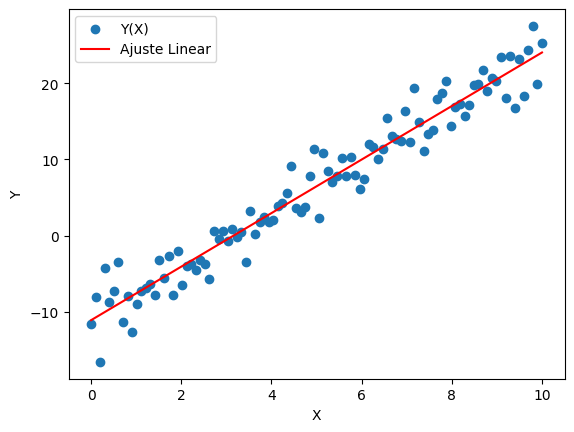

In [159]:
fig,ax = plt.subplots()

ax.scatter(X, y, label='Y(X)')
ax.plot(X, reta, label='Ajuste Linear', color='red')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

plt.show()

In [165]:
# Avaliando métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y, reta)
mse = mean_squared_error(y, reta)
rmse = np.sqrt(mean_squared_error(y, reta))

print('MAE = {:0.2f}'.format(mae))
print('MSE = {:0.2f}'.format(mse))
print('RMSE = {:0.2f}'.format(rmse)) # o ponto pode estar com o valor de RMSE acima ou abaixo da reta

MAE = 1.89
MSE = 5.91
RMSE = 2.43
